### Problem Statement
Introduction
Solving this assignment will give you an idea about how real business problems are solved using EDA. In this case study, apart from applying the techniques you have learnt in EDA, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

  

Business Understanding
You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

 

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

 

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

Figure 1. Loan Data Set
Figure 1. Loan Data Set
When a person applies for a loan, there are two types of decisions that could be taken by the company:

Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)
 

Business Objectives
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 


To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).

 

Data Understanding
 

Download the dataset from below. It contains the complete loan data for all loans issued through the time period 2007 t0 2011.

#### Results Expected
Write all your code in one well-commented Python file; briefly mention the insights and observations from the analysis 
Present the overall approach of the analysis in a presentation 
Mention the problem statement and the analysis approach briefly 
Explain the results of univariate, bivariate analysis etc. in business terms
Include visualisations and summarise the most important results in the presentation
 

You need to submit one Ipython notebook which clearly explains the thought process behind your analysis (either in comments of markdown text), code and relevant plots. 

 

Important Note: Please make sure to rename your Python notebook "Group_Facilitator_Name.ipynb". 

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##Task 1: Reading data

In [2]:
# Reading Files in jupyter notebook
# loan = pd.read_csv("loan.csv", low_memory=False)

In [3]:
# Mounting drive to read data in google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Reading data in google colab
loan = pd.read_csv("/content/drive/MyDrive/loan.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# Reading first few line
loan.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
#Q1: How many unique customers, that means there are no duplicates
len(loan['id'].unique())

39717

In [7]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [8]:
# To print list of columns
for col in loan.columns:
    print(col)

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_il_6m
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc

##Task 2: Identify variables required for analysis and Subset data for analysis based on problem statement

In [9]:
# Set up format of values for readability
pd.options.display.float_format = '{:,.1f}'.format
# pd.options.display.float_format = '{:,}'.format

In [10]:
# Checking missing values -  loan.isnull().sum()
# Checking duplicates
# loan = loan.drop_duplicates()
# loan.shape
# print(loan.duplicated(subset=None,keep='first').count())
dup=loan[loan.duplicated(['id'])]
dup
# There are no duplicate rows in loan dataset

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


In [11]:
# sum it up to check how many rows have all missing values
print('Number of empty Rows:')
print(loan.isnull().all(axis=1).sum())
# Observation: There are no empty rows in whole dataset.

# sum it up to check how many columns have all missing values
print('Number of empty Columns:')
print(loan.isnull().all(axis=0).sum())
# Observation: There are 54 columns have all missing values.

Number of empty Rows:
0
Number of empty Columns:
54


In [12]:
# Remove column with all na values
# loan.drop(loan.iloc[:, 53:105], inplace = True, axis = 1) 
# The default is how='any', such that any row or column (depending on the axis keyword) containing a null value will be dropped. 
# You can also specify how='all', which will only drop rows/columns that are all null values:
# df.dropna(axis='columns', how='all')
# Refer link - https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html

loan.dropna(axis='columns', how='all', inplace=True)


In [13]:
loan.shape
# Earlier there were 111 columns, after removing columns with all null values we have 57 columns

(39717, 57)

In [14]:
# For finer-grained control, the thresh parameter lets you specify a minimum number of non-null values for the row/column to be kept:
# loan.dropna(axis='rows', thresh = 4)

In [15]:
loan.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,"4,975.0",36 months,10.65%,162.9,B,B2,NaN,10+ years,RENT,"24,000.0",Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.6,0,Jan-85,1,nan,nan,3,0,13648,83.70%,9,f,0.0,0.0,"5,863.2","5,833.8","5,000.0",863.2,0.0,0.0,0.0,Jan-15,171.6,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,"2,500.0",60 months,15.27%,59.8,C,C4,Ryder,< 1 year,RENT,"30,000.0",Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.0,0,Apr-99,5,nan,nan,3,0,1687,9.40%,4,f,0.0,0.0,"1,008.7","1,008.7",456.5,435.2,0.0,117.1,1.1,Apr-13,119.7,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [16]:
# Let's look at (loan_status variable)
loan['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [17]:
# Since we are not considering current loans, lets filter dataframe for - 'Fully Paid' and 'Charged Off'
loan = loan[loan['loan_status'].isin(['Fully Paid', 'Charged Off'])]
# 38577 rows

In [18]:
loan.shape

(38577, 57)

In [19]:
# Next let's remove columns related to current loan status, as we are looking at paid or charge off accounts
not_required1 =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d"]

In [20]:
# Removing variables related to current loan status as this is not relevant in analysis

# drop_list1 = ["member_id","url","emp_title","zip_code","tax_liens"]
# loan.drop(labels = drop_list1, axis =1, inplace=True)
# refer - https://www.geeksforgeeks.org/select-rows-columns-by-name-or-index-in-pandas-dataframe-using-loc-iloc/?ref=rp
# Using loc method to subset dataset for not_required1
# a = loan.loc[:,loan.columns!="application_type"]

loan.drop(labels = not_required1,axis=1,inplace=True)
# loan = loan.loc[:,~loan.columns.isin(not_required1)]

In [21]:
loan.shape

(38577, 37)

Since we need to identify variables not relevant for analysis. Specially where we have all column with missing information. Although we had run drop.na, still there are few variables where we do see 0 and na values

In [22]:
# Let's further look at variables where we have missing values
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2)
missing[missing != 0]

emp_title                      6.2
emp_length                     2.7
desc                          32.5
title                          0.0
mths_since_last_delinq        64.6
mths_since_last_record        92.9
next_pymnt_d                 100.0
collections_12_mths_ex_med     0.1
chargeoff_within_12_mths       0.1
pub_rec_bankruptcies           1.8
tax_liens                      0.1
dtype: float64

Let's further look at each variable where we have found missing values

In [23]:
loan['tax_liens'].unique()

array([ 0., nan])

In [24]:
loan.chargeoff_within_12_mths.unique()

array([ 0., nan])

In [25]:
loan.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [26]:
loan.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

In [27]:
loan.title.unique()

array(['Computer', 'bike', 'real estate business', ...,
       'Retiring credit card debt', 'MBA Loan Consolidation', 'JAL Loan'],
      dtype=object)

In [28]:
loan.desc.unique()

array(['  Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>',
       '  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>',
       nan, ...,
       'Our current gutter system on our home is old and in need of repair.    We will be using the borrowed funds to replace the gutter system on our home.',
       'The rate of interest and fees incurred by carrying a balance on my credit card are so outrageous at this point that continuing

Let's look at unique count of each variable

In [29]:
loan.nunique().sort_values()

next_pymnt_d                      0
tax_liens                         1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
acc_now_delinq                    1
chargeoff_within_12_mths          1
delinq_amnt                       1
loan_status                       2
term                              2
verification_status               3
pub_rec_bankruptcies              3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
sub_grade                        35
addr_state                       50
issue_d                          55
mths_since_last_delinq           95
mths_since_last_record          111
int_rate                        370
zip_code                        822
loan_amnt                       870
funded_amnt                    1019
dti                         

We do see there are few variables not relevant for analysis such as emp_title, desc, id, member_id, url.
Also, we do see there are few columns where only one value in throught the column being repeated - tax_liens, application_type,policy_code,
collections_12_mths_ex_med, initial_list_status,
pymnt_plan, acc_now_delinq, chargeoff_within_12_mths,
delinq_amnt

Details of list that looks redundant for analysis:
1. pymnt_plan :
value for entire dataset is 'n', therefore can be removed.
2. url :
is a URL for LC page for corresponding to each memberid, nothing to do with loan default.
3. zip_code :
as we are using addr_state, does not contribute to analysis
4. initial_list_status :
value for entire dataset is 'f' out of the possible values, therefore can be removed.
5. policy_code :
value for entire dataset is '1', indicating all are publicly available, therefore nothing to contribute for analysis, to be removed.
6. application_type :
value for entire dataset is 'INDIVIDUAL', indicating all are individual applications not joint, therefore nothing to contribute for analysis, to be removed.
7. acc_now_delinq :
value for entire dataset is '0', therefore can be removed.
8. delinq_amnt :
value for entire dataset is '0', therefore can be removed.


In [30]:
loan.acc_now_delinq.unique()

array([0])

In [31]:
loan['policy_code'].unique()

array([1])

In [32]:
loan['initial_list_status'].unique()

array(['f'], dtype=object)

In [33]:
loan['pymnt_plan'].unique()

array(['n'], dtype=object)

In [34]:
loan['delinq_amnt'].unique()

array([0])

In [35]:
# Loan applications as an individual application or a joint application with two co-borrowers
loan['application_type'].unique()

array(['INDIVIDUAL'], dtype=object)

In [36]:
# "title", "desc", "id", "member_id" these columns are not required for further analysis
# Also, there are only 0 and nan values in "tax_liens", "chargeoff_within_12_mths", "collections_12_mths_ex_med"
not_required2 = ["emp_title","emp_length","title", "desc", "id", "member_id","tax_liens", "chargeoff_within_12_mths", "collections_12_mths_ex_med","pymnt_plan", "url","zip_code", "initial_list_status","policy_code", "application_type", "acc_now_delinq","delinq_amnt"]

In [37]:
loan = loan.loc[:,~loan.columns.isin(not_required2)]

In [38]:
loan.shape

(38577, 20)

In [39]:
loan.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,mths_since_last_delinq,mths_since_last_record,next_pymnt_d,pub_rec_bankruptcies
0,5000,5000,"4,975.0",36 months,10.65%,162.9,B,B2,RENT,"24,000.0",Verified,Dec-11,Fully Paid,credit_card,AZ,27.6,nan,nan,NaN,0.0
1,2500,2500,"2,500.0",60 months,15.27%,59.8,C,C4,RENT,"30,000.0",Source Verified,Dec-11,Charged Off,car,GA,1.0,nan,nan,NaN,0.0


In [40]:
for col in loan.columns:
    print(col)

loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
home_ownership
annual_inc
verification_status
issue_d
loan_status
purpose
addr_state
dti
mths_since_last_delinq
mths_since_last_record
next_pymnt_d
pub_rec_bankruptcies


In [41]:
loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,mths_since_last_delinq,mths_since_last_record,pub_rec_bankruptcies
count,"38,577.0","38,577.0","38,577.0","38,577.0","38,577.0","38,577.0","13,672.0","2,740.0","37,880.0"
mean,"11,047.0","10,784.1","10,222.5",322.5,"68,778.0",13.3,35.9,69.3,0.0
std,"7,348.4","7,090.3","7,022.7",208.6,"64,218.7",6.7,22.0,44.0,0.2
min,500.0,500.0,0.0,15.7,"4,000.0",0.0,0.0,0.0,0.0
25%,"5,300.0","5,200.0","5,000.0",165.7,"40,000.0",8.1,18.0,19.8,0.0
50%,"9,600.0","9,550.0","8,733.4",277.9,"58,868.0",13.4,34.0,90.0,0.0
75%,"15,000.0","15,000.0","14,000.0",425.6,"82,000.0",18.6,52.0,104.0,0.0
max,"35,000.0","35,000.0","35,000.0","1,305.2","6,000,000.0",30.0,120.0,129.0,2.0


In [42]:
loan.grade.unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [43]:
loan.sub_grade.unique()

array(['B2', 'C4', 'C5', 'C1', 'A4', 'E1', 'F2', 'B5', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F1', 'E5', 'G4', 'E2', 'G2', 'G1', 'F5', 'F4',
       'G5', 'G3'], dtype=object)

In [44]:
# By looking at describe results - "loan_amnt", "funded_amnt", "funded_amnt_inv" - all looks similar
# sub-grade looks not required for analysis, as we have grade variable 
not_required3 = ["sub_grade","funded_amnt", "funded_amnt_inv" ]
loan = loan.loc[:,~loan.columns.isin(not_required3)]

In [45]:
loan.shape

(38577, 17)

In [46]:
loan.head(1)

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,mths_since_last_delinq,mths_since_last_record,next_pymnt_d,pub_rec_bankruptcies
0,5000,36 months,10.65%,162.9,B,RENT,"24,000.0",Verified,Dec-11,Fully Paid,credit_card,AZ,27.6,nan,nan,NaN,0.0


In [47]:
# loan.emp_title.value_counts()


In [48]:
# loan.emp_length.fillna('0',inplace=True)
# loan['emp_length']=loan.emp_length.str.extract('(\d+)')
# loan.head(2)
# loan.emp_length.value_counts()

##Task 3: Univariate Analysis

Task- 3.1 : Variable Transformation

Interest rate has % symbol with values and is stored as object. To perform numerical analysis we need to convert this to float

In [49]:
loan['int_rate'].describe()

count      38577
unique       370
top       10.99%
freq         913
Name: int_rate, dtype: object

In [50]:
loan.shape

(38577, 17)

In [51]:
# loan['int_rate'] = loan['int_rate'].str.rstrip('%')
# convert it to float
loan['int_rate'] = loan['int_rate'].str.strip('%').astype('float')


In [52]:
loan.head(1)

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,mths_since_last_delinq,mths_since_last_record,next_pymnt_d,pub_rec_bankruptcies
0,5000,36 months,10.7,162.9,B,RENT,"24,000.0",Verified,Dec-11,Fully Paid,credit_card,AZ,27.6,nan,nan,NaN,0.0


#### Task - 3.2 : Derive new columns from existing


In [53]:
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan['year']=loan['issue_d'].dt.year
loan['month']=loan['issue_d'].dt.month

loan.head(1)


,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,mths_since_last_delinq,mths_since_last_record,next_pymnt_d,pub_rec_bankruptcies,year,month
0,5000,36 months,10.7,162.9,B,RENT,"24,000.0",Verified,2011-12-01,Fully Paid,credit_card,AZ,27.6,nan,nan,NaN,0.0,2011,12


## Task-4: Variable binning

#### Approach - 1 : For bucketing of continous variable, look at boxplot. And find lower threshold and upper threshold to subset dataset, so that we can ignore outliers and have normalized data

In [54]:
loan.loan_amnt.describe()

count   38,577.0
mean    11,047.0
std      7,348.4
min        500.0
25%      5,300.0
50%      9,600.0
75%     15,000.0
max     35,000.0
Name: loan_amnt, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


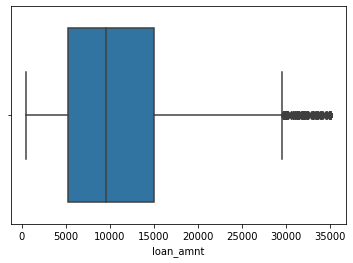

In [55]:
sns.boxplot(loan.loan_amnt)

Calculate interquartile range (IQR)=Q3-Q1. Calculate lower boundary LB = Q1-(1.5*IQR) Calculate upper boundary UB = Q3+(1.5*IQR)


In [56]:
# First quartile (Q1)
Q1 = np.percentile(loan['loan_amnt'], 25, interpolation = 'midpoint')
  
# # Third quartile (Q3)
Q3 = np.percentile(loan['loan_amnt'], 75, interpolation = 'midpoint')
  
# # Interquaritle range (IQR)
# IQR = Q3 - Q1
  
# print(IQR)

# Import stats from scipy library
from scipy import stats

# Interquartile range (IQR)
IQR = stats.iqr(loan['loan_amnt'], interpolation = 'midpoint')
  
print(IQR)

LB = Q1-(1.5*IQR)
UB = Q3+(1.5*IQR)
print(LB)
print(UB)



9700.0
-9250.0
29550.0


Below functions can be used for variable binning of continous variables and to look at the distribution of variables 


In [57]:
def PercentileCut (*, data, column, trailer=''):
    """
        Parameters:
            data : defaulted to 'loan'
            column : this is the continuous numeric field which has to be binned to its percentiles
            trailer : defaulted to blank, this will be added to the end of the percentile values
                      like '%' for interest rate related fields
        Returns:
            None
            It creates a new column in the data with a suffix '_p' and this contains the newly created category
    """
    new_column = column + '_p'
    labels = ['Lowest ','Lower ','Medium ','Higher ','Highest ']
    labels = [labels[p] + '(' +
              str(round(np.nanpercentile(data[column], p * 20),2)) +
              trailer + ' - ' +
              str(round(np.nanpercentile(data[column], (p+1) * 20),2)) +
              trailer + ')'
              for p in range(5)]
    data[new_column] = pd.qcut(data[column], q=5, labels=labels)

In [58]:
def distribution_plot_continous(data,column):
  sns.distplot(data[column])
  plt.axvline(x=np.mean(data[column]),c='red',ls='--',label='mean')
  plt.axvline(x=np.percentile(data[column],25),c='green',ls='--')
  plt.axvline(x=np.percentile(data[column],75),c='green',ls='--')
  #to show labels
  plt.legend()

####Question 1: What does the distribution of Loan amount look like? Is it skewed?

Variable distribution and bucketing for - Loan Amount

Red line shows mean, Green lines shows 25 and 75 percentile 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


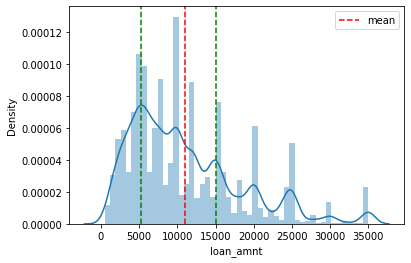

In [59]:
distribution_plot_continous(data=loan,column='loan_amnt')

In [60]:
PercentileCut(data=loan,column='loan_amnt')

In [61]:
100*(loan['loan_amnt_p'].value_counts(normalize=True))

Lowest (500.0 - 5000.0)       24.6
Medium (7750.0 - 11200.0)     20.2
Higher (11200.0 - 16000.0)    20.1
Highest (16000.0 - 35000.0)   19.6
Lower (5000.0 - 7750.0)       15.6
Name: loan_amnt_p, dtype: float64

Text(0.5, 1.0, 'Loan amount frequency')

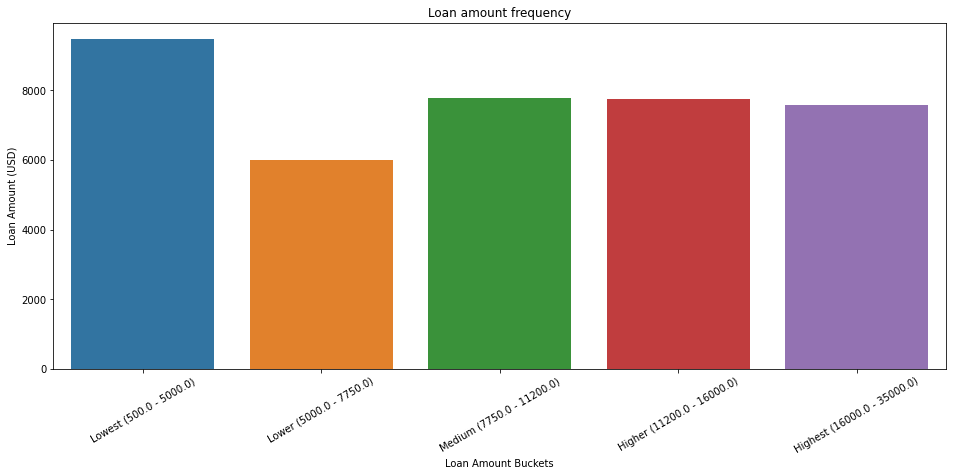

In [62]:
plt.figure(figsize=(16, 14))
plt.subplot(2, 1, 1)
p = sns.barplot(x='loan_amnt_p', y='loan_amnt', data=loan, estimator=np.count_nonzero)
p.set_ylabel('Loan Amount (USD)')
p.set_xticklabels(p.get_xticklabels(),rotation=30)
p.set_xlabel('Loan Amount Buckets')
plt.title('Loan amount frequency')

By looking at distribution we get fair idea that we have right skewed distribution of Loan amount. We can subset dataset by removing those loans with 29,550 or greater amount

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


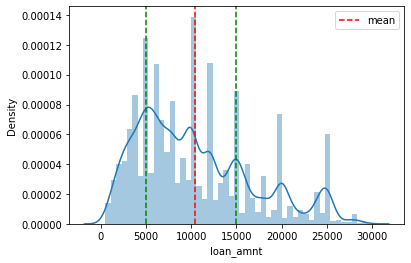

In [63]:
df=loan[loan['loan_amnt']<=29550]
distribution_plot_continous(data=df,column='loan_amnt')

####Question 2: What does the distribution of annual income of borrowers looks like? Is it skewed?

In [64]:
# First quartile (Q1)
Q1 = np.percentile(loan['annual_inc'], 25, interpolation = 'midpoint')
  
# # Third quartile (Q3)
Q3 = np.percentile(loan['annual_inc'], 75, interpolation = 'midpoint')
  
# # Interquaritle range (IQR)
# IQR = Q3 - Q1
  
# print(IQR)

# Import stats from scipy library
from scipy import stats

# Interquartile range (IQR)
IQR = stats.iqr(loan['annual_inc'], interpolation = 'midpoint')
  
print(IQR)

LB = Q1-(1.5*IQR)
UB = Q3+(1.5*IQR)
print(LB)
print(UB)

42000.0
-23000.0
145000.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


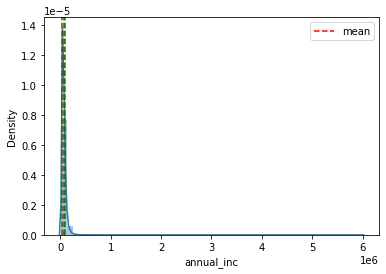

In [65]:
distribution_plot_continous(data=loan,column='annual_inc')
PercentileCut(data=loan,column='annual_inc')

In [66]:
100*(loan['annual_inc_p'].value_counts(normalize=True))

Higher (65004.0 - 90000.0)      20.6
Lower (37196.16 - 50004.0)      20.1
Lowest (4000.0 - 37196.16)      20.0
Medium (50004.0 - 65004.0)      19.9
Highest (90000.0 - 6000000.0)   19.4
Name: annual_inc_p, dtype: float64

Text(0.5, 1.0, 'Annual Income frequency')

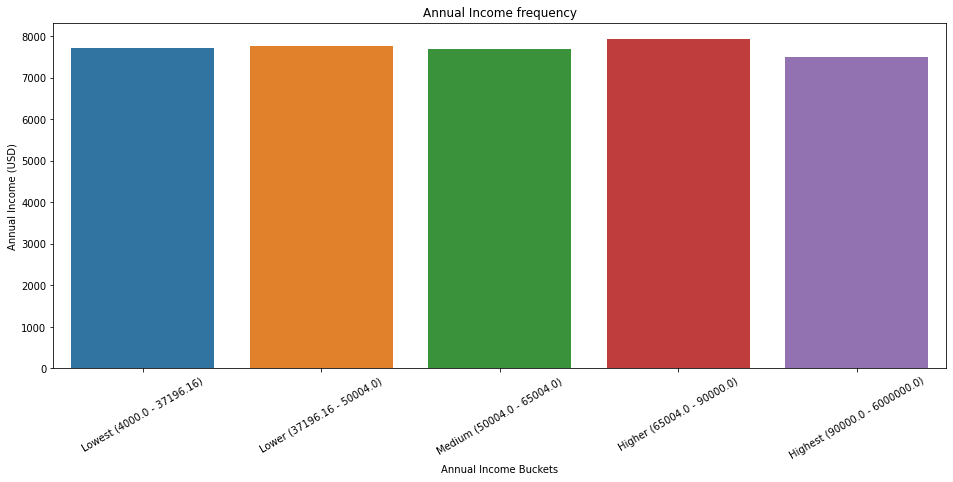

In [67]:
plt.figure(figsize=(16, 14))
plt.subplot(2, 1, 1)
p = sns.barplot(x='annual_inc_p', y='annual_inc', data=loan, estimator=np.count_nonzero)
p.set_ylabel('Annual Income (USD)')
p.set_xticklabels(p.get_xticklabels(),rotation=30)
p.set_xlabel('Annual Income Buckets')
plt.title('Annual Income frequency')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


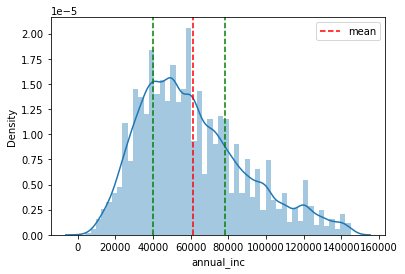

In [68]:
df=loan[loan['annual_inc']<=145000]
distribution_plot_continous(data=df,column='annual_inc')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


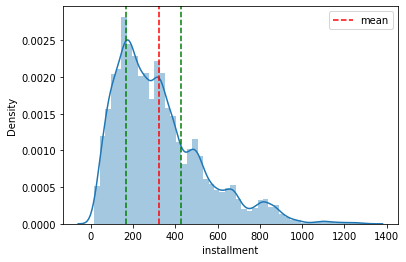

In [69]:
distribution_plot_continous(data=loan,column='installment')

#### Lets subset dataset for annual income and loan amout.

In [70]:
# df = loan[(loan["annual_inc"] <= 90000) & (loan["loan_amnt"] <= 16000) ]

df = loan[(loan["annual_inc"] <= 145000) & (loan["loan_amnt"] <= 29550) ]


Let's visualize continous variables again

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


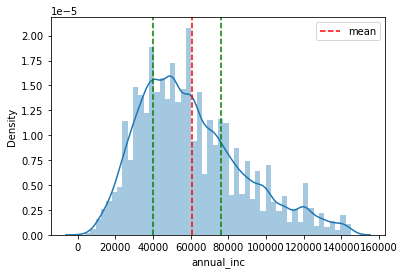

In [71]:
distribution_plot_continous(data=df,column='annual_inc')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


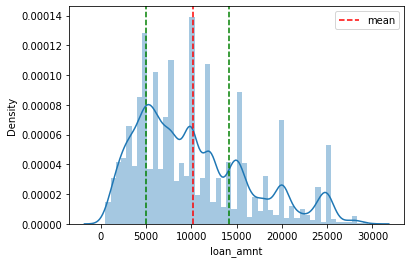

In [72]:
distribution_plot_continous(data=df,column='loan_amnt')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


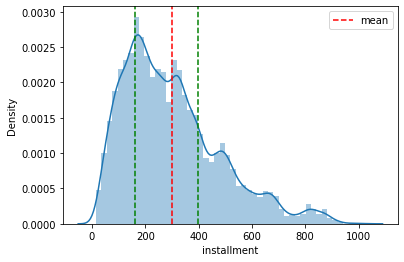

In [73]:
distribution_plot_continous(data=df,column='installment')

In [74]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,mths_since_last_delinq,mths_since_last_record,pub_rec_bankruptcies,year,month
count,"35,983.0","35,983.0","35,983.0","35,983.0","35,983.0","12,746.0","2,633.0","35,322.0","35,983.0","35,983.0"
mean,"10,192.6",11.8,300.2,"60,464.0",13.4,36.0,69.5,0.0,"2,010.3",7.1
std,"6,267.4",3.6,182.5,"27,866.9",6.7,22.0,43.9,0.2,0.9,3.4
min,500.0,5.4,15.7,"4,000.0",0.0,0.0,0.0,0.0,"2,007.0",1.0
25%,"5,000.0",8.9,161.9,"40,000.0",8.3,18.0,21.0,0.0,"2,010.0",4.0
50%,"9,000.0",11.7,264.8,"55,000.0",13.5,34.0,90.0,0.0,"2,011.0",7.0
75%,"14,125.0",14.3,397.6,"76,000.0",18.7,52.0,104.0,0.0,"2,011.0",10.0
max,"29,500.0",24.4,"1,022.9","145,000.0",30.0,120.0,129.0,2.0,"2,011.0",12.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


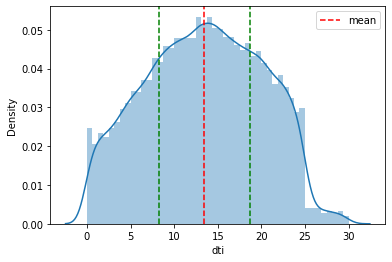

In [75]:
distribution_plot_continous(data=df,column='dti')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


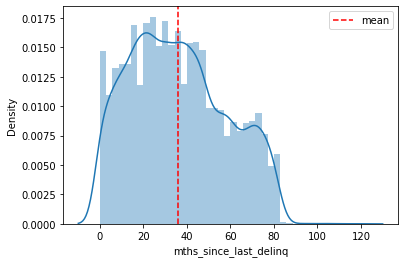

In [76]:
distribution_plot_continous(data=df,column='mths_since_last_delinq')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


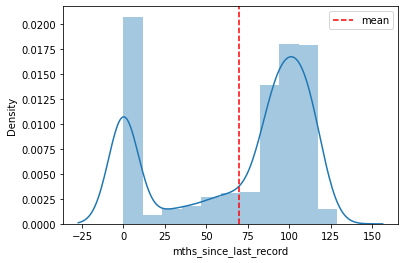

In [77]:
distribution_plot_continous(data=df,column='mths_since_last_record')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


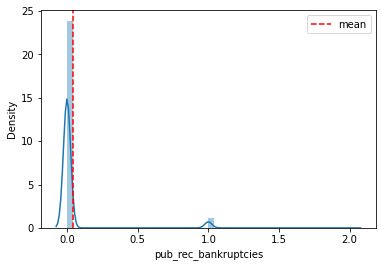

In [78]:
distribution_plot_continous(data=df,column='pub_rec_bankruptcies')

In [79]:
df.head(2)

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,mths_since_last_delinq,mths_since_last_record,next_pymnt_d,pub_rec_bankruptcies,year,month,loan_amnt_p,annual_inc_p
0,5000,36 months,10.7,162.9,B,RENT,"24,000.0",Verified,2011-12-01,Fully Paid,credit_card,AZ,27.6,nan,nan,NaN,0.0,2011,12,Lowest (500.0 - 5000.0),Lowest (4000.0 - 37196.16)
1,2500,60 months,15.3,59.8,C,RENT,"30,000.0",Source Verified,2011-12-01,Charged Off,car,GA,1.0,nan,nan,NaN,0.0,2011,12,Lowest (500.0 - 5000.0),Lowest (4000.0 - 37196.16)


#### Univariate of categorical variables

Question - 3: What is the purpose for which people take loan?

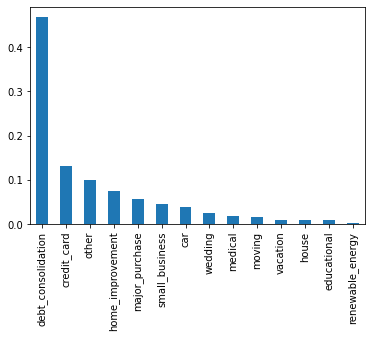

In [80]:
# Debt consilidation has been purpose for more than 40% of loan applications 
loan.purpose.value_counts(normalize=True).plot(kind='bar')

Question - 4: What is the duration of the loan for which loans are taken?

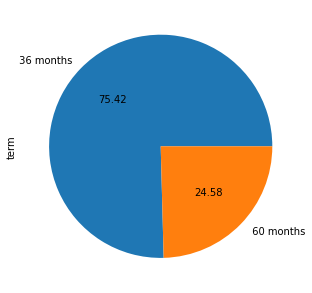

In [81]:
# 75% of the applications are given for 36months term loan
loan['term'].value_counts(normalize=True).plot(kind='pie',figsize=(5,10), autopct="%.2f")

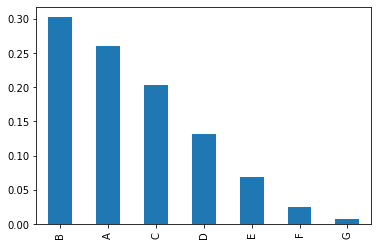

In [82]:
# 60% of the applications are considered for Grade - A,B and C
loan['grade'].value_counts(normalize=True).plot(kind='bar')

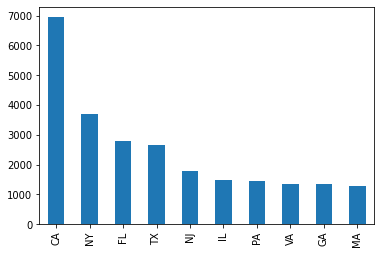

In [83]:
# Loan applications by borrowers in each state
loan['addr_state'].value_counts()[:10].plot(kind="bar")
# California, New York and Florida are the states where we have most of the customers

In [84]:
loan['home_ownership'].value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

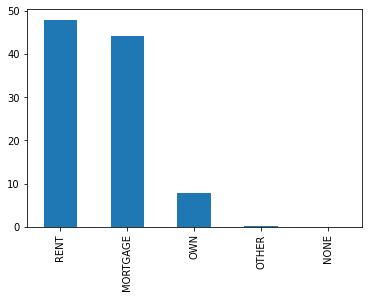

In [85]:
# 48% of application are given to Borrowers with Rented houses
# 44% of the Borrowers have houses on Mortgage
round(100* loan['home_ownership'].value_counts(normalize=True),2).plot(kind='bar')

More than 50% of loan applications have received in 2011


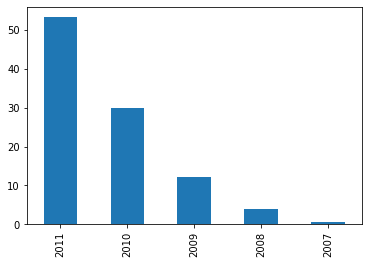

In [86]:
round(100* loan['year'].value_counts(normalize=True),2).plot(kind='bar')

## Bivariate Analysis

In [87]:
# df.isnull().sum()

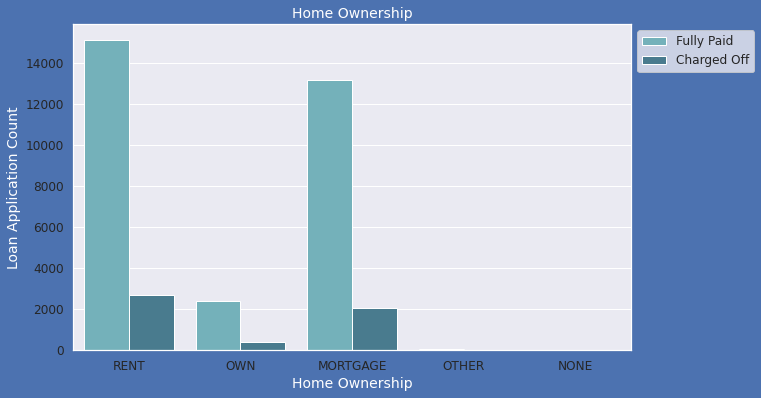

In [89]:
# Observations :
# Below plot shows that most of them living in rented home or mortgaged their home.


plt.figure(figsize=(10,6),facecolor='b')
ax = sns.countplot(x="home_ownership",data=df,hue='loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14,color='w')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

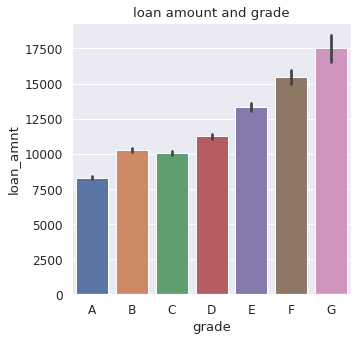

In [90]:
plt.figure(figsize = (5,5))
plt.title('loan amount and grade')
sns.barplot(x='grade', y="loan_amnt", data=df, estimator=np.mean,order="ABCDEFG")
plt.show()
# Average loan amount taken by Grade- G customers is higher

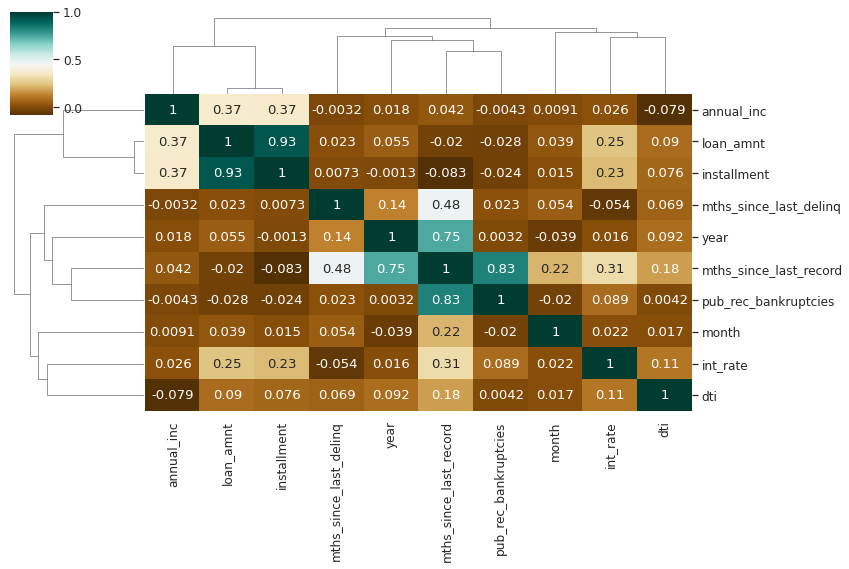

In [88]:
# Correlation Matrix - Quantitative Variables

loan_correlation = df.corr()
sns.set(font_scale=1.1)
sns.clustermap(loan_correlation,annot=True,figsize=(12, 8),cmap="BrBG")
plt.show()
# Loan amount and installment is highly correlated. That means higher loans have bigger installments as well to be paid by borrower
# Interest rate is negatively correlated to months since last deliquency. That means when customer defaults on loan payments, interest rate increases
# Months since last deliquency is also negatively correlated to income. Which shows lower annual income of customer is related to the reason of deliquency
# Annual income has negative relation to debt to income ratio(DTI), Bankrupcy (pub_rec_bankruptcies). 